In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


In [ ]:
file_name = "train-chennai-sale.csv"
df_original = pd.read_csv(file_name)
df_original.head()


PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [ ]:
# copy the original df into variable df
df = df_original.copy(deep=True)


In [ ]:
df.shape


(7109, 22)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

    There are few missing entries in some columns


In [ ]:
df.isna().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

    QS_OVERALL column has maximum missing columns
    From viewing the data it seems that QS_OVERALL seems to be an average of [QS_ROOMS, QS_BATHROOM,QS_BEDROOM]
    Let us verify this hypothesis


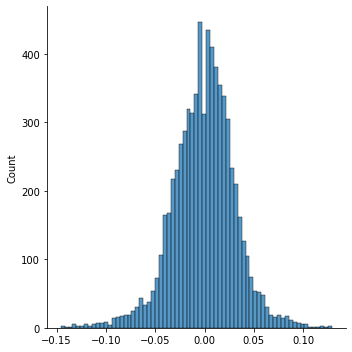

In [ ]:
temp_df = df[["QS_ROOMS", "QS_BATHROOM", "QS_BEDROOM", "QS_OVERALL"]].dropna()
mean_sr = temp_df[["QS_ROOMS", "QS_BATHROOM",
                   "QS_BEDROOM"]].mean(axis=1).round(2)
error = (temp_df["QS_OVERALL"]-mean_sr)/temp_df["QS_OVERALL"]
sns.displot(error)


In [ ]:
correlation = temp_df["QS_OVERALL"].corr(mean_sr)
correlation, abs(error).mean()


(0.978956797730621, 0.02393408391764116)

    From above we know that correlation is almost 1 mean error within 2.5% we can safely assume that our hypothesis is correct and the error is probably from rounding off before data entry.
    Hence we can safely calculate the missing  "QS_OVERALL" by finding the mean of other 3 features


> Fill missing "QS_OVERALL" with mean of ["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM"]


In [ ]:
temp_df = df[["QS_ROOMS", "QS_BATHROOM", "QS_BEDROOM"]].mean(
    axis=1).round(2).rename("QS_OVERALL")
df["QS_OVERALL"].fillna(temp_df, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
missing_rows = df.isna().sum(axis=1).sum()
missing_rows, missing_rows/df.shape[0]


(6, 0.0008440005626670418)

    The rows with remaining missing data are very low 6 nos lesser than 0.1%. Hence we can drop those rows


In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7103 non-null   object 
 1   AREA           7103 non-null   object 
 2   INT_SQFT       7103 non-null   int64  
 3   DATE_SALE      7103 non-null   object 
 4   DIST_MAINROAD  7103 non-null   int64  
 5   N_BEDROOM      7103 non-null   float64
 6   N_BATHROOM     7103 non-null   float64
 7   N_ROOM         7103 non-null   int64  
 8   SALE_COND      7103 non-null   object 
 9   PARK_FACIL     7103 non-null   object 
 10  DATE_BUILD     7103 non-null   object 
 11  BUILDTYPE      7103 non-null   object 
 12  UTILITY_AVAIL  7103 non-null   object 
 13  STREET         7103 non-null   object 
 14  MZZONE         7103 non-null   object 
 15  QS_ROOMS       7103 non-null   float64
 16  QS_BATHROOM    7103 non-null   float64
 17  QS_BEDROOM     7103 non-null   float64
 18  QS_OVERA

> Checking Object columns for datatype/data format


In [ ]:
df.select_dtypes(include='object').head()


PRT_ID        AREA   DATE_SALE SALE_COND PARK_FACIL  DATE_BUILD  \
0  P03210  Karapakkam  04-05-2011  AbNormal        Yes  15-05-1967   
1  P09411  Anna Nagar  19-12-2006  AbNormal         No  22-12-1995   
2  P01812       Adyar  04-02-2012  AbNormal        Yes  09-02-1992   
3  P05346   Velachery  13-03-2010    Family         No  18-03-1988   
4  P06210  Karapakkam  05-10-2009  AbNormal        Yes  13-10-1979   

    BUILDTYPE UTILITY_AVAIL  STREET MZZONE  
0  Commercial        AllPub   Paved      A  
1  Commercial        AllPub  Gravel     RH  
2  Commercial           ELO  Gravel     RL  
3      Others       NoSewr    Paved      I  
4      Others        AllPub  Gravel      C

    Checking redundant columns:

1. column PRT_ID is an ID column
2. columns [REG_FEE, COMMIS] will be available only during
   purchase so will not be available for model prediction stage.

> _Removing columns [PRT_ID, REG_FEE, COMMIS]_


In [ ]:
to_drop = ["PRT_ID", "REG_FEE", "COMMIS"]
df.drop(to_drop, axis=1, inplace=True)


In [ ]:
print(df)

            AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004  04-05-2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909  04-02-2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226  05-10-2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7098  Karapakkam       598  03-01-2011             51        1.0         1.0   
7099   Velachery      1897  08-04-2004             52        3.0         2.0   
7100   Velachery      1614  25-08-2006            152        2.0         1.0   
7101  Karapakkam       787  03-08-2009             40        1.0         1.0   
7102   Velachery      1896  13-07-2005            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  D

In [ ]:
df.head()

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004  04-05-2011            131        1.0         1.0   
1  Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2       Adyar       909  04-02-2012             70        1.0         1.0   
3   Velachery      1855  13-03-2010             14        3.0         2.0   
4  Karapakkam      1226  05-10-2009             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes  15-05-1967  Commercial        AllPub   Paved   
1       5  AbNormal         No  22-12-1995  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes  09-02-1992  Commercial           ELO  Gravel   
3       5    Family         No  18-03-1988      Others       NoSewr    Paved   
4       3  AbNormal        Yes  13-10-1979      Others        AllPub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330      7600000  
1     RH       4.9          4.2         2.5       3.765     21717770  
2     RL       4.1          3.8         2.2       3.090     13159200  
3      I       4.7          3.9         3.6       4.010      9630290  
4      C       3.0          2.5         4.1       3.290      7406250

In [ ]:
columns = df.select_dtypes(include='object').columns
dtype_map = dict(zip(columns, ['str']*len(columns)))
df = df.astype(dtype_map)
date_cnames = list(filter(lambda cname: cname.startswith("DATE"), columns))
for cname in date_cnames:
    df[cname] = \
        pd.to_datetime(df[cname].str.strip(), format="%d-%m-%Y")
columns = df.select_dtypes(include='float').columns
int_cnames = list(filter(lambda cname: cname.startswith("N_"), columns))
dtype_map_obj = dict(zip(int_cnames, [np.int32]*len(int_cnames)))
df = df.astype(dtype_map_obj)
df.dtypes


AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

> _Check for spelling mismatch in object columns_


In [ ]:
obj_cnames = df.select_dtypes(include='object').columns
for cname in obj_cnames:
    print(df[cname].unique())


['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


> We have a few spelling variations
>
> _eg: 'Anna Nagar' vs 'Ana Nagar' , 'Partial' vs 'PartiaLl', etc._

    We will fix this by:

1. converting these columns to same case
2. removing the blank characters
3. comparing and grouping similar spelling using fuzzywuzzy package
4. replacing the variations with a common spelling


In [ ]:
def transform_str(str_: str):
    return str_.replace(" ", "").lower()


for cname in obj_cnames:
    df[cname] = df[cname].apply(transform_str)
for cname in obj_cnames:
    print(df[cname].unique())


['karapakkam' 'annanagar' 'adyar' 'velachery' 'chrompet' 'kknagar'
 'tnagar' 'chrompt' 'chrmpet' 'karapakam' 'ananagar' 'chormpet' 'adyr'
 'velchery' 'annnagar']
['abnormal' 'family' 'partial' 'adjland' 'normalsale' 'partiall']
['yes' 'no' 'noo']
['commercial' 'others' 'other' 'house' 'comercial']
['allpub' 'elo' 'nosewr' 'nosewa']
['paved' 'gravel' 'noaccess' 'pavd']
['a' 'rh' 'rl' 'i' 'c' 'rm']


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fuzzywuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import process as fw_p


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def extract_similar(str_list: list, match_percent=50):
    match_obj, matched = {}, []
    for str_ in str_list:
        if str_ not in matched:
            matches = fw_p.extract(str_, str_list, limit=10)
            matches = list(filter(
                lambda match: match[1] >= match_percent and match[1] < 100, matches))
            if len(matches):
                matched += list(map(lambda x: x[0], matches))
                match_obj[str_] = matches
    return match_obj


In [ ]:
mapping_obj_ = {}
for cname in obj_cnames:
    mapping_obj_[cname] = extract_similar(df[cname].unique(), 75)
mapping_obj_


{'AREA': {'karapakkam': [('karapakam', 95)],
  'annanagar': [('ananagar', 94), ('annnagar', 94), ('tnagar', 75)],
  'adyar': [('adyr', 89)],
  'velachery': [('velchery', 94)],
  'chrompet': [('chrompt', 93), ('chrmpet', 93), ('chormpet', 88)],
  'kknagar': [('tnagar', 77)]},
 'SALE_COND': {'partial': [('partiall', 93)]},
 'PARK_FACIL': {'no': [('noo', 90)]},
 'BUILDTYPE': {'commercial': [('comercial', 95)], 'others': [('other', 91)]},
 'UTILITY_AVAIL': {'nosewr': [('nosewa', 83)]},
 'STREET': {'paved': [('pavd', 89)]},
 'MZZONE': {}}

    From the above output we can screen what we require


In [ ]:
mapping_obj_ = {'AREA': {'karapakkam': [('karapakam', 95)],
                         'annanagar': [('ananagar', 94), ('annnagar', 94)],
                         'adyar': [('adyr', 89)],
                         'velachery': [('velchery', 94)],
                         'chrompet': [('chrompt', 93), ('chrmpet', 93), ('chormpet', 88)],
                         },
                'SALE_COND': {'partial': [('partiall', 93)]},
                'PARK_FACIL': {'no': [('noo', 90)]},
                'BUILDTYPE': {'commercial': [('comercial', 95)], 'other': [('others', 91)]},
                'UTILITY_AVAIL': {'nosewr': [('nosewa', 83)]},
                'STREET': {'paved': [('pavd', 89)]},
                }


In [ ]:
mapping_obj = {}
for key, value in mapping_obj_.items():
    temp_obj = {}
    for sub_key, sub_val in value.items():
        list_ = list(map(lambda item: item[0], sub_val))
        dict_ = dict(zip(list_, [sub_key]*len(list_)))
        temp_obj = {**dict_, **temp_obj}
    mapping_obj[key] = temp_obj

df.replace(mapping_obj, inplace=True)

for cname in obj_cnames:
    print(df[cname].unique())


['karapakkam' 'annanagar' 'adyar' 'velachery' 'chrompet' 'kknagar'
 'tnagar']
['abnormal' 'family' 'partial' 'adjland' 'normalsale']
['yes' 'no']
['commercial' 'other' 'house']
['allpub' 'elo' 'nosewr']
['paved' 'gravel' 'noaccess']
['a' 'rh' 'rl' 'i' 'c' 'rm']


    Check if we have done replacing correctly


In [ ]:

for cname in obj_cnames:
    li1 = df_original[cname].apply(transform_str).unique()
    li2 = df[cname].unique().tolist()
    print(sorted(set(li1) - set(li2)))


['adyr', 'ananagar', 'annnagar', 'chormpet', 'chrmpet', 'chrompt', 'karapakam', 'velchery']
['partiall']
['noo']
['comercial', 'others']
['nosewa']
['pavd']
[]


In [ ]:
print(df)

            AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     karapakkam      1004 2011-05-04            131          1           1   
1      annanagar      1986 2006-12-19             26          2           1   
2          adyar       909 2012-02-04             70          1           1   
3      velachery      1855 2010-03-13             14          3           2   
4     karapakkam      1226 2009-10-05             84          1           1   
...          ...       ...        ...            ...        ...         ...   
7098  karapakkam       598 2011-01-03             51          1           1   
7099   velachery      1897 2004-04-08             52          3           2   
7100   velachery      1614 2006-08-25            152          2           1   
7101  karapakkam       787 2009-08-03             40          1           1   
7102   velachery      1896 2005-07-13            156          3           2   

      N_ROOM   SALE_COND PARK_FACIL DATE_BUILD   BU

    Outlier detection


In [ ]:
def outlier(series: pd.Series):
    z_score = (series-series.mean())/series.std()
    outliers_mask = np.abs(z_score) > 3
    return series[outliers_mask].to_list()


In [ ]:
num_cnames = df.select_dtypes(exclude=['object', 'datetime']).columns.to_list()
outlier_obj = {}
for i, cname in enumerate(num_cnames):
    outliers = outlier(df[cname])
    if len(outliers):
        outlier_obj[cname] = \
            {"outliers": outliers, "total": len(outliers)}
outlier_obj


{'SALES_PRICE': {'outliers': [23307000,
   22630540,
   22829130,
   22449450,
   22744800,
   23667340,
   22348850,
   22567050,
   22916500,
   22302670,
   22499190,
   22778410,
   22918500,
   22319600,
   22852890,
   22300300,
   22712170,
   22519520,
   22459910,
   22633000,
   23247590,
   22431260,
   22686330,
   22619470,
   22593290,
   22499550,
   22401070,
   23314580,
   22217590,
   23407860,
   22726060,
   22579530,
   22465060,
   22351040,
   22629400,
   23013500],
  'total': 36}}

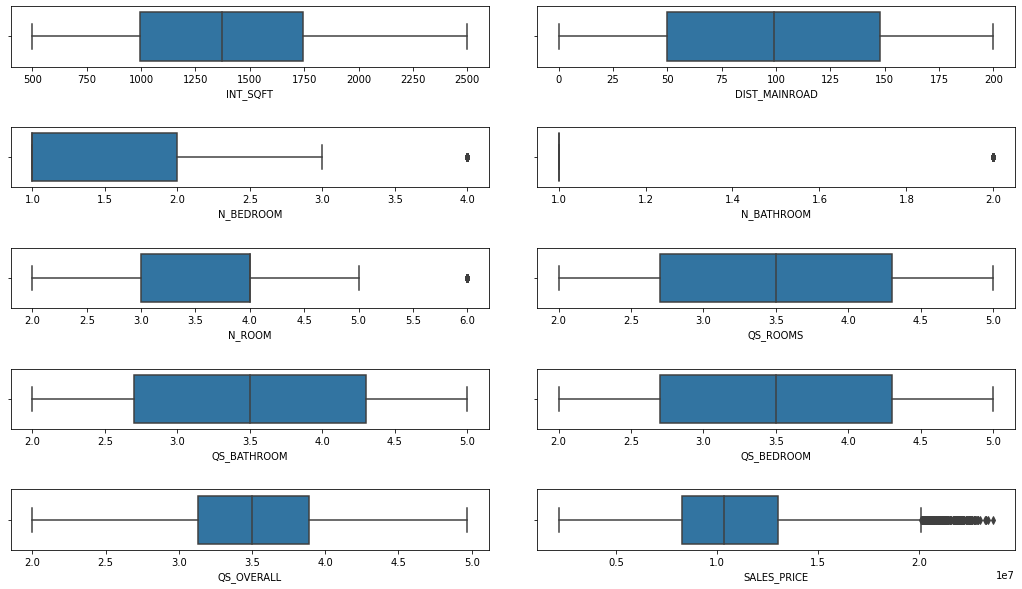

In [ ]:
items_len = len(num_cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.subplots_adjust(wspace=0.1, hspace=1)

for i, cname in enumerate(num_cnames):
    axis = axes[int(i//2), i % 2]
    sns.boxplot(x=df[cname], ax=axis)


    Distribution Overview


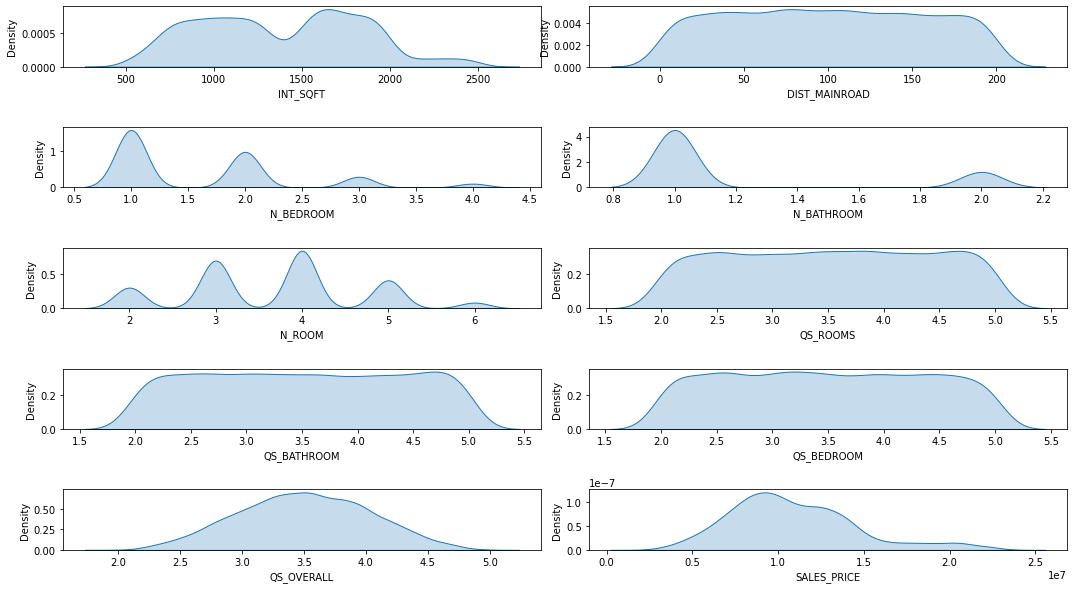

In [ ]:
num_cnames = df.select_dtypes(exclude=['object', 'datetime']).columns.to_list()

items_len = len(num_cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.subplots_adjust(wspace=0.1, hspace=1)

for i, cname in enumerate(num_cnames):
    axis = axes[int(i//2), i % 2]
    sns.kdeplot(x=df[cname], shade=True, ax=axis)


    There is no significant skew in any of the plots


    Since the outliers in SALES_PRICE form a common pattern we will not be removing them


    Corelation of numerical features


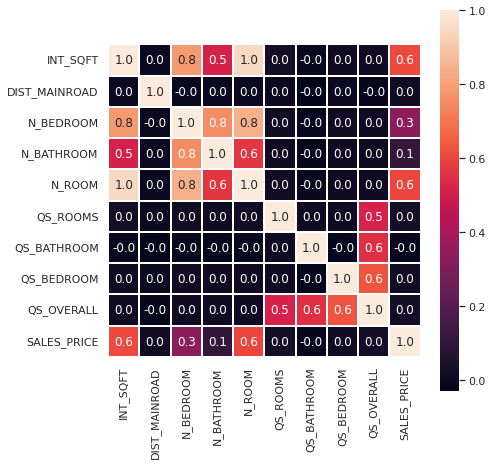

In [ ]:
sns.set(rc={'figure.figsize': (7, 7)})
sns.heatmap(data=df.corr(), square=True, annot=True, fmt='.1f', linewidths=1)


    Plotting scatter plots of numeric features vs target


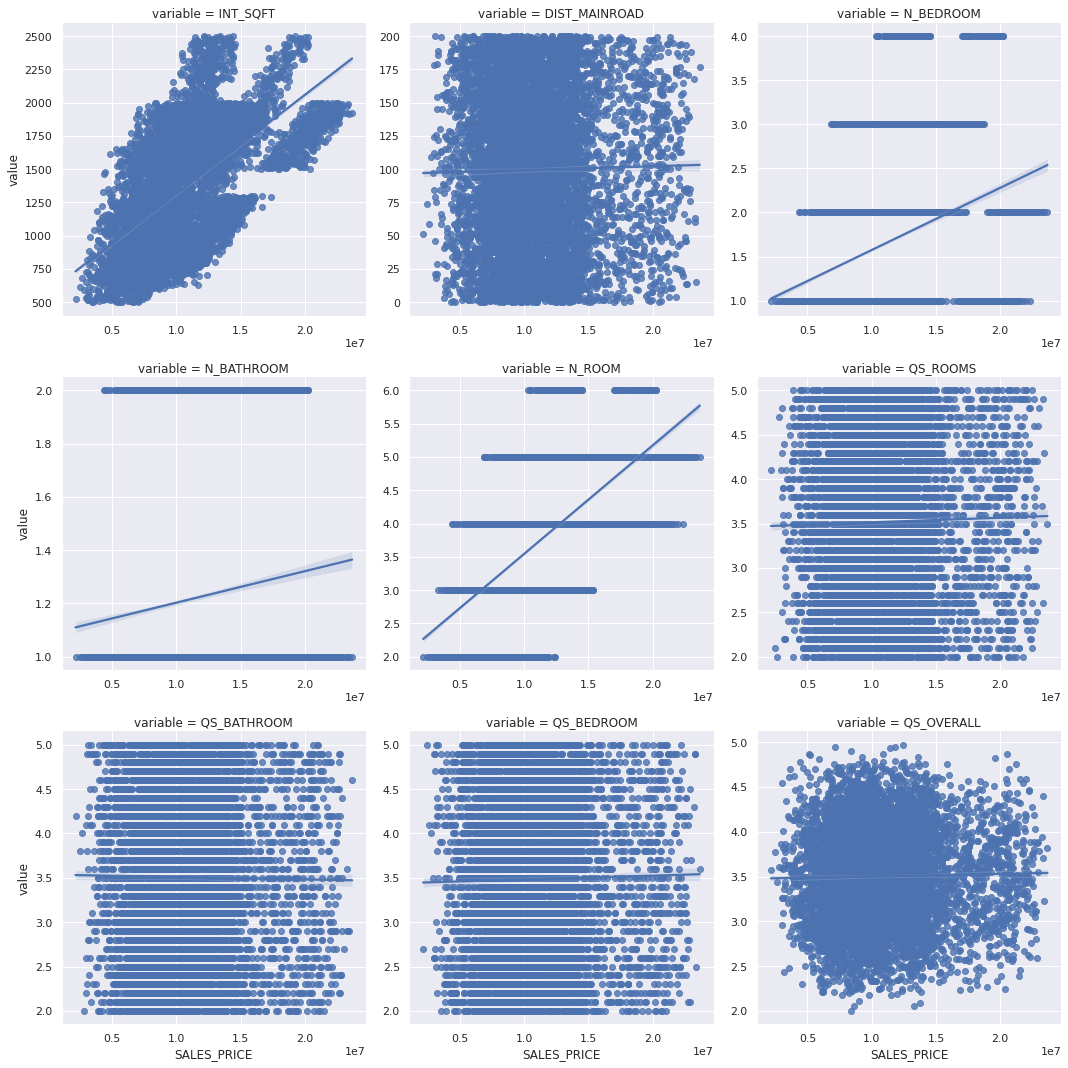

In [ ]:
num_cnames = df.select_dtypes(exclude=['object', 'datetime']).columns
melt_df = df.melt(id_vars=["SALES_PRICE"], value_vars=num_cnames)
sns.lmplot(x="SALES_PRICE", y="value", data=melt_df, col="variable",
           col_wrap=3, facet_kws={"sharex": False, "sharey": False}, )


    Since the QS and DIST_MAINROAD columns correlation < 0.01 to target and doesn't show any indication of improvement by transformation we will remove those columns


In [ ]:
to_drop = ["QS_ROOMS", "QS_BATHROOM",
           "QS_BEDROOM", "QS_OVERALL", "DIST_MAINROAD"]
df.drop(to_drop, axis=1, inplace=True)


    Bar plots for categorical features


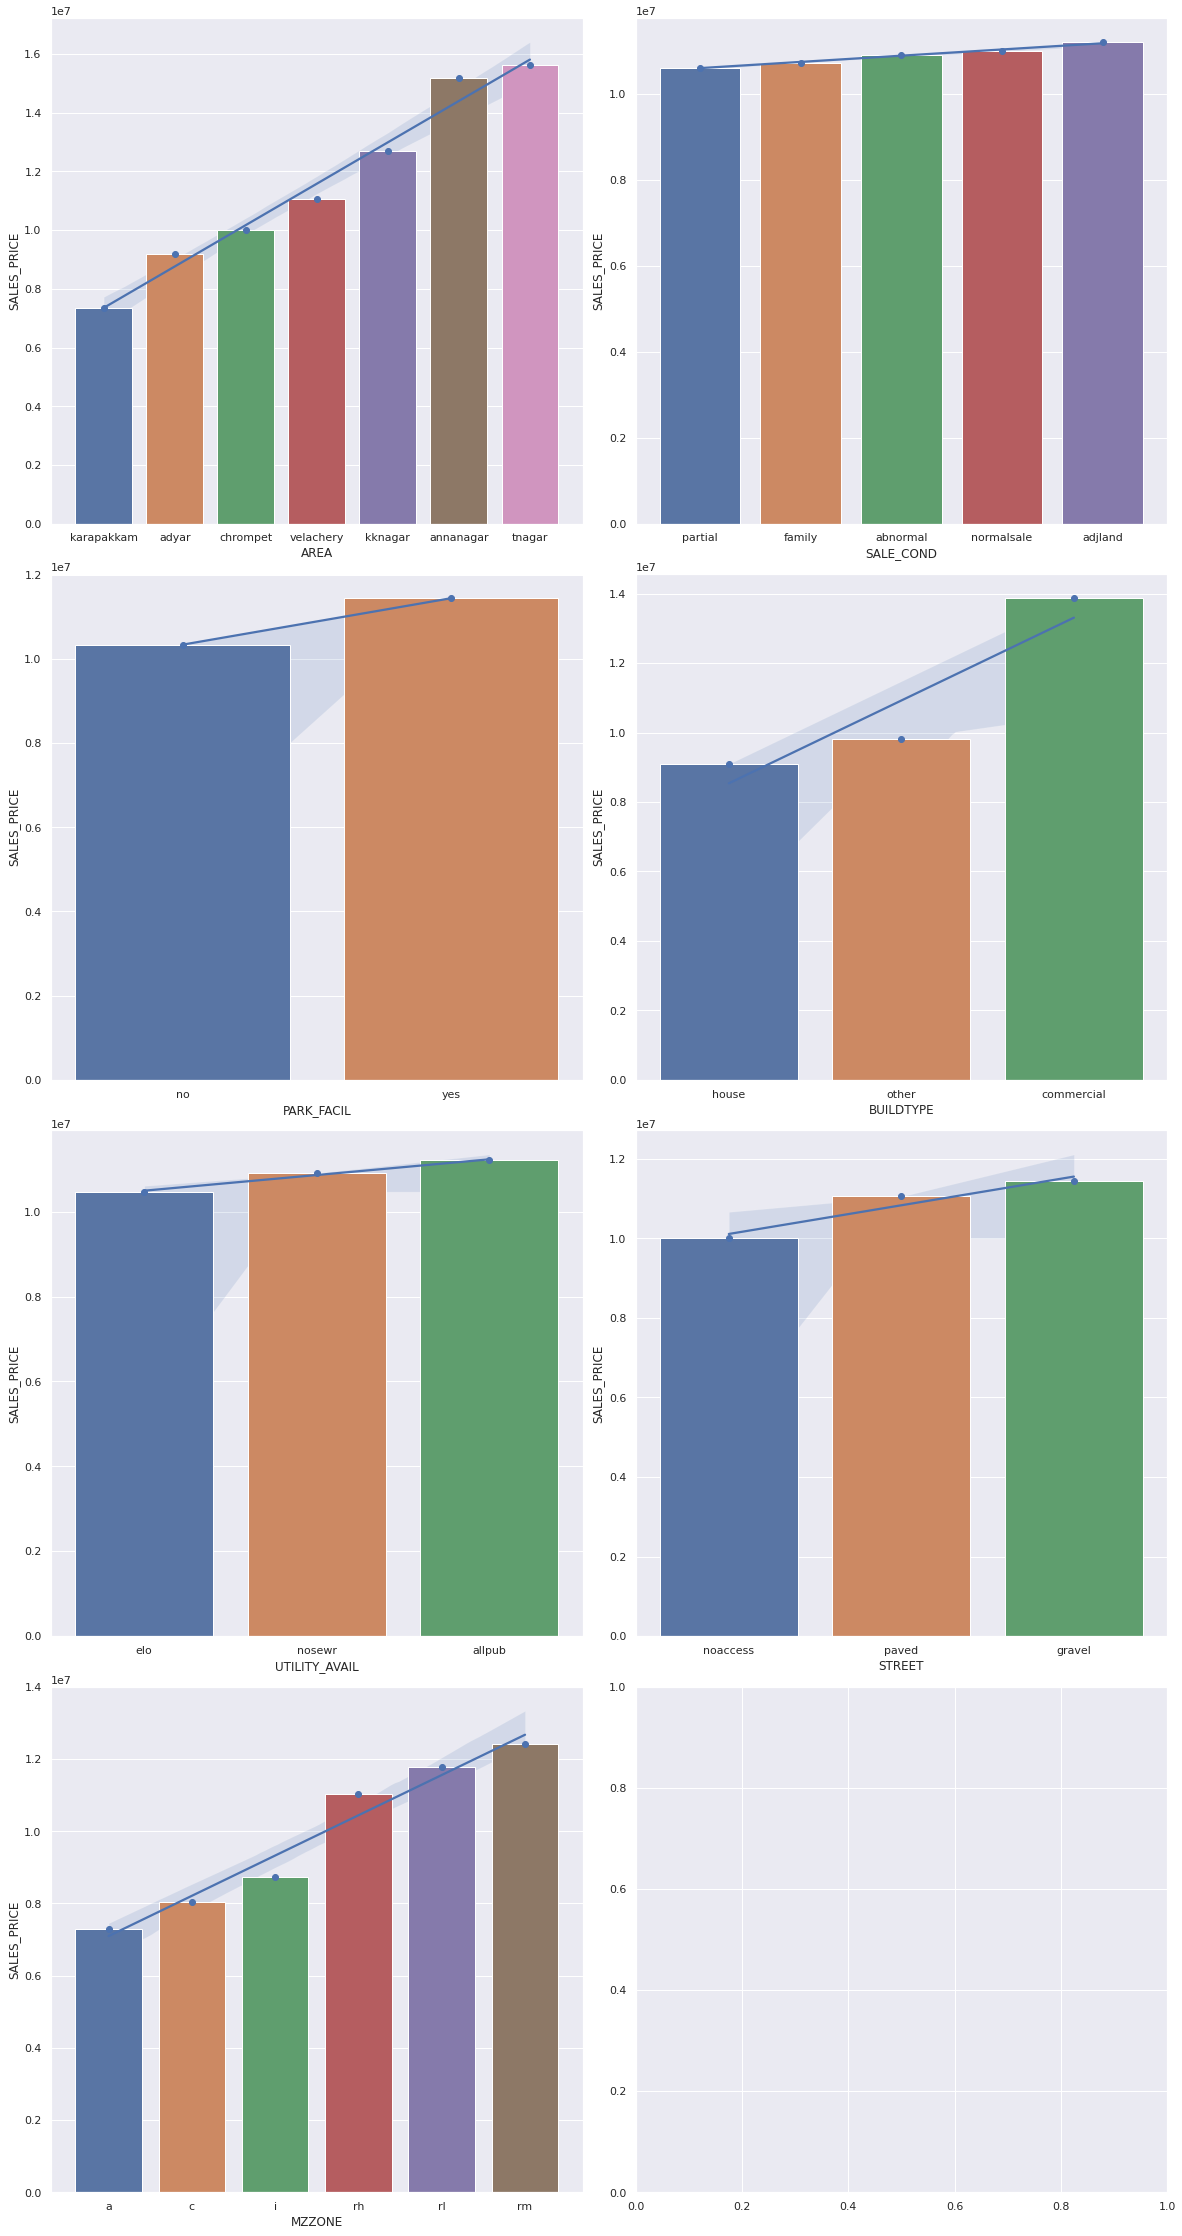

In [ ]:
cnames = df.select_dtypes(include=['object']).columns

items_len = len(cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, cname in enumerate(cnames):
    axis = axes[int(i//2), i % 2]
    data = df[["SALES_PRICE", cname]].groupby([cname])\
        .mean().sort_values("SALES_PRICE")
    sns.barplot(data=data, x=data.index, y=data["SALES_PRICE"], ax=axis, )
    sns.regplot(x=list(range(data.shape[0])), y=data["SALES_PRICE"], ax=axis, scatter_kws={
                "zorder": 10, "alpha": 1}, ci=90)


    All the above features have a good linear regression fit except for build type ,
    So let us try to transform to an order 2 regression fit and and see if it improves.


In [ ]:
data = df[["SALES_PRICE", "BUILDTYPE"]].groupby(["BUILDTYPE"])\
    .mean().sort_values("SALES_PRICE")


In [ ]:
def transform(x): return np.round(np.exp(x),).astype("int16")


In [ ]:

data["LABEL"] = list(map(transform, range(data.shape[0])))
data


SALES_PRICE  LABEL
BUILDTYPE                      
house       9.098151e+06      1
other       9.805210e+06      3
commercial  1.386984e+07      7

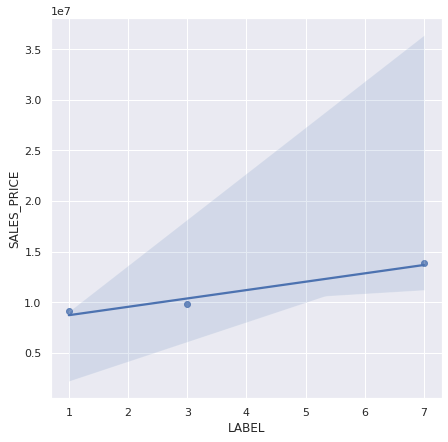

In [ ]:
sns.regplot(x=data["LABEL"], y=data["SALES_PRICE"])


    As we can see our transformation has created a good linear fit. So we will use this for the label encoding


    Let us look at the distribution of each categorical data across the INT_SQFT and SALES_PRICE for better understanding of our cat features


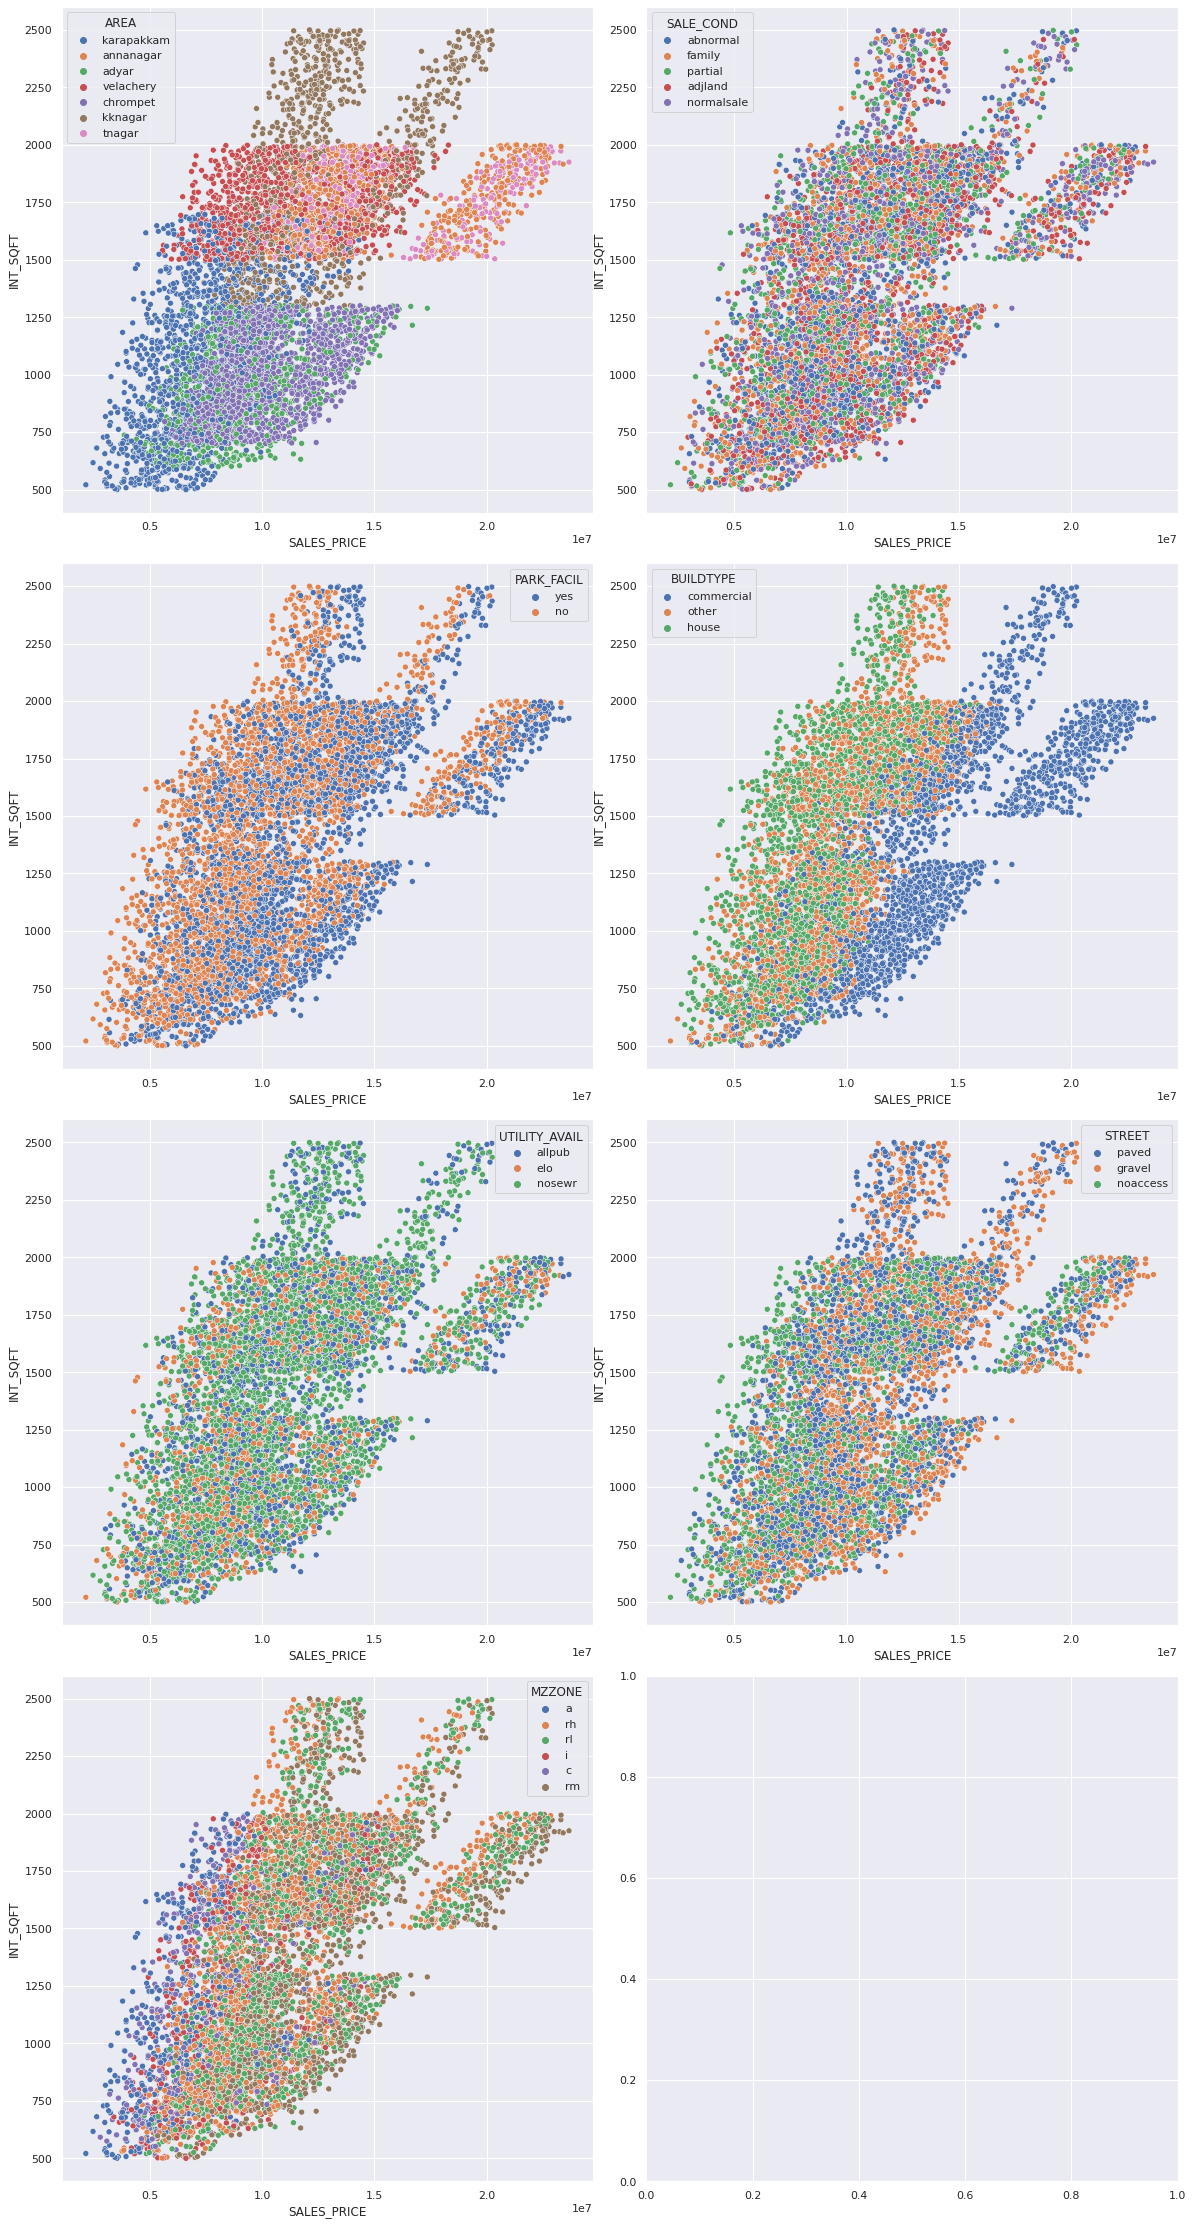

In [ ]:
cnames = df.select_dtypes(include=['object']).columns
items_len = len(cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, cname in enumerate(cnames):
    axis = axes[int(i//2), i % 2]
    sns.scatterplot(x="SALES_PRICE", y="INT_SQFT",
                    hue=cname, data=df, ax=axis)


    All of the categorical features seem to have at the least minor variance information


    Let us see if we can create new features that can have linear corelation with SALES_PRICE from the information we got from pair plot
    There is one more feature we can add from knowing the built and sale date
    proposed new features:

1. AVG_ROOM_SIZE
2. AGE


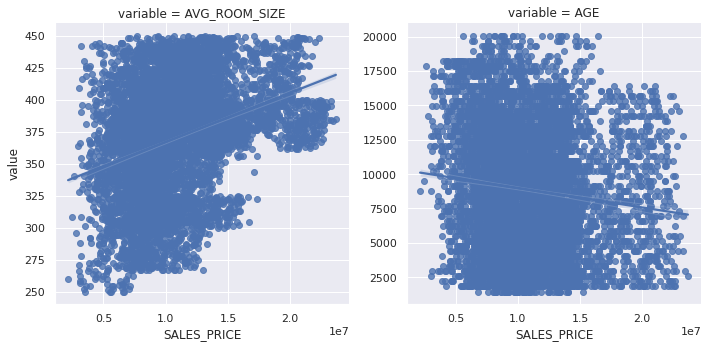

In [ ]:
temp_df = df[["SALES_PRICE"]].copy(deep=True)
temp_df["AVG_ROOM_SIZE"] = (df["INT_SQFT"]/df["N_ROOM"]).round(0)
temp_df["AGE"] = (df["DATE_SALE"]-df["DATE_BUILD"]).dt.days
cnames = temp_df.drop("SALES_PRICE", axis=1).columns
melt_df = temp_df.melt(id_vars=["SALES_PRICE"], value_vars=cnames)
sns.lmplot(x="SALES_PRICE", y="value", data=melt_df, col="variable",
           col_wrap=2, facet_kws={"sharex": False, "sharey": False}, )


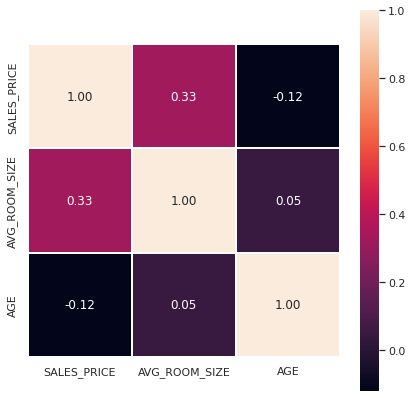

In [ ]:
sns.heatmap(data=temp_df.corr(), square=True,
            annot=True, fmt='.2f', linewidths=1)


In [ ]:
df = df.join(temp_df[["AVG_ROOM_SIZE", "AGE"]])


    Since our new feature AVG_ROOM_SIZE is highly correlated INT_SQFT (because it was created from INT_SQFT) and the scatter plot shows symptoms of clusters we will run K-means on the AVG_ROOM_SIZE,INT_SQFT features and and replace the cluster ids in place of this column


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
from sklearn.preprocessing import StandardScaler

# importing the required function
scaler = StandardScaler()
temp_df = df[["AVG_ROOM_SIZE", "INT_SQFT"]]
scaled_df = pd.DataFrame(scaler.fit_transform(temp_df
                                              ), columns=temp_df.columns.to_list())
scaled_df.head()


AVG_ROOM_SIZE  INT_SQFT
0      -0.808796 -0.826573
1       0.607499  1.320099
2      -1.539787 -1.034245
3       0.013568  1.033731
4       0.881620 -0.341276

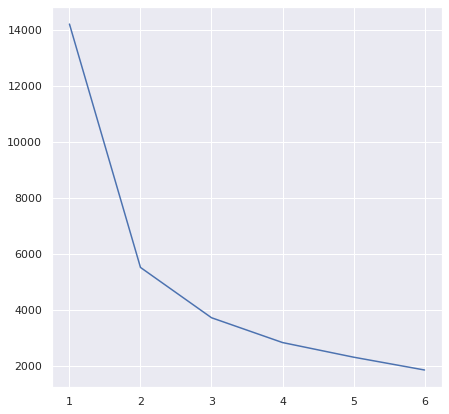

In [ ]:
inertia = []
for i in range(1, 7):
    cluster_model = KMeans(i)
    cluster_model.fit_predict(scaled_df.to_numpy())
    inertia.append(cluster_model.inertia_)
sns.lineplot(y=inertia, x=range(1, len(inertia)+1))


In [ ]:
!pip install --upgrade kneed



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Knee:  2


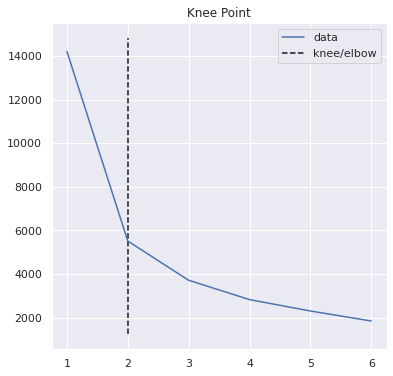

In [ ]:
import kneed
kneedle = kneed.KneeLocator(
    list(range(1, len(inertia)+1)), inertia, curve="convex", direction="decreasing")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()


    We can understand the knee is at 2 from the plot hence we will select 2 as hyperparam


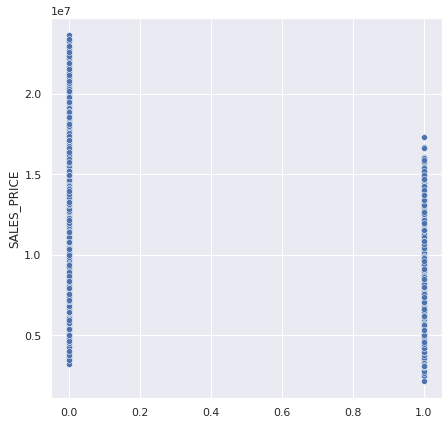

In [ ]:
cluster_model = KMeans(n_clusters=2)
label_column = cluster_model.fit_predict(scaled_df)
sns.scatterplot(data=df, x=label_column, y="SALES_PRICE")


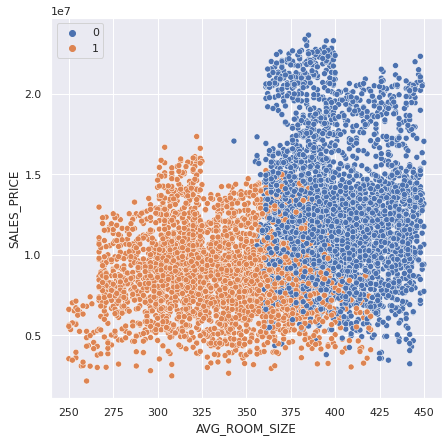

In [ ]:
sns.scatterplot(data=df, x="AVG_ROOM_SIZE", y="SALES_PRICE", hue=label_column)


In [ ]:
data = pd.DataFrame({"SALES_PRICE": df["SALES_PRICE"], "LABEL": label_column})
data = data.groupby(["LABEL"])\
    .mean().sort_values("SALES_PRICE")
data


SALES_PRICE
LABEL              
1      8.922819e+06
0      1.254589e+07

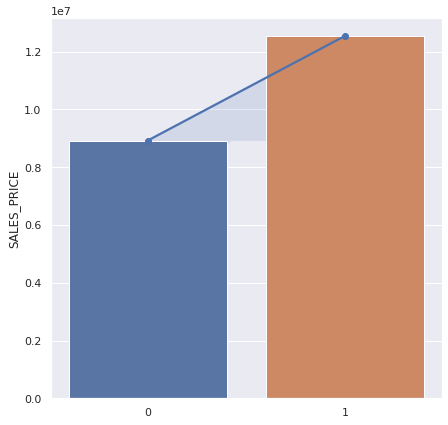

In [ ]:
sns.barplot(x=list(range(data.shape[0])), y=data["SALES_PRICE"],)
sns.regplot(x=list(range(data.shape[0])), y=data["SALES_PRICE"], scatter_kws={
    "zorder": 10, "alpha": 1}, ci=90)


    This plot shows us the grouping of spacious houses vs congested houses
    And we get a good liner fit for the average room size vs target


    Lets look if there is some trend connected with built/sale date


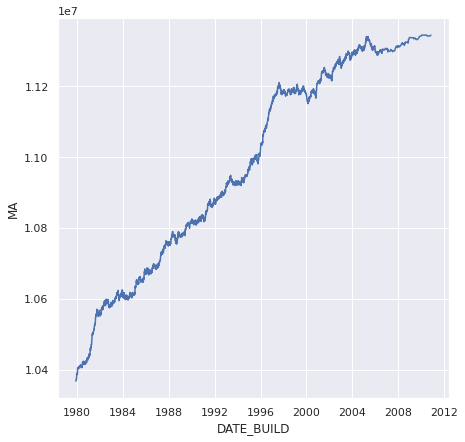

In [ ]:
temp_df = df[["DATE_BUILD", "SALES_PRICE"]]
temp_df = temp_df.groupby("DATE_BUILD").mean()
temp_df["MA"] = temp_df["SALES_PRICE"].rolling(2000).mean().dropna()
sns.lineplot(y=temp_df["MA"], x=temp_df.index)


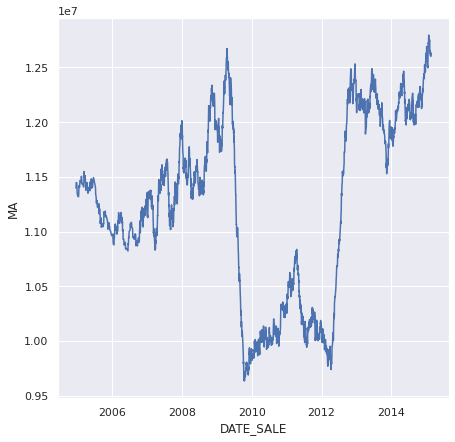

In [ ]:
temp_df = df[["DATE_SALE", "SALES_PRICE"]]
temp_df = temp_df.groupby("DATE_SALE").mean()
temp_df["MA"] = temp_df["SALES_PRICE"].rolling(100).mean().dropna()
sns.lineplot(y=temp_df["MA"], x=temp_df.index)


    From the above plots we can see there are two trends in the price .

1. Contemporary houses are costlier
2. Price also increases due to inflation


    We also seem to have a big outlier in trend from late 2008 to early 2012
    After some google search we find that Developers faced funding shortages due to the stock market crash of 2008, and fleeing foreign investors. This has led to residential project delays, and cancellations.


    The first trend can be learnt by converting the date built to number of days and then forming a regression line from the rolling average. We also can try to create a Principal component from the build date and age feature.
    The second trend however we will not know since the date of sale is unknown util the sale has been done.


    We can add another colum with binary variable that indicates there was a crash in housing market during this period.


In [ ]:
df["N_DAYS_BUILT"] = (pd.to_datetime('today')-df["DATE_BUILD"]).dt.days


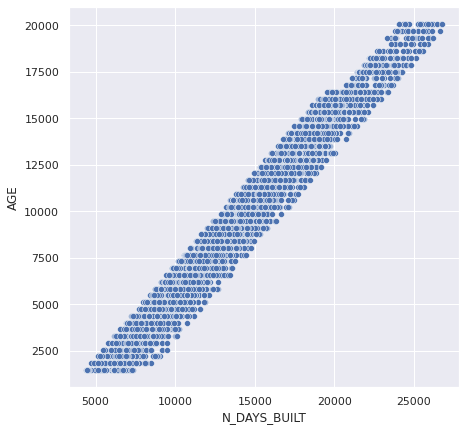

In [ ]:
sns.scatterplot(x=df["N_DAYS_BUILT"], y=df["AGE"], data=df, )


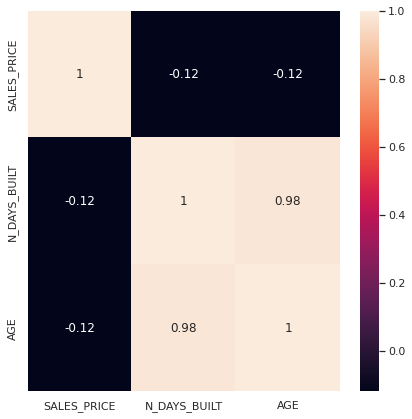

In [ ]:
corr = df[["SALES_PRICE", "N_DAYS_BUILT", "AGE"]].corr()
sns.heatmap(corr, annot=True)


    We can see that N_DAYS_BUILT and AGE are highly correlated and hence it does not make sense to use both ; This can be due to the fact that only newer sales have been recorded and hence the the housed built and sold long ago are missing from the data , due to this fact we will choose to drop N_DAYS_BUILT feature


In [ ]:
to_drop = ["N_DAYS_BUILT"]
df.drop(to_drop, axis=1, inplace=True)


(array([733408., 733467., 733528., 733589., 733651., 733712., 733773.]),
 <a list of 7 Text major ticklabel objects>)

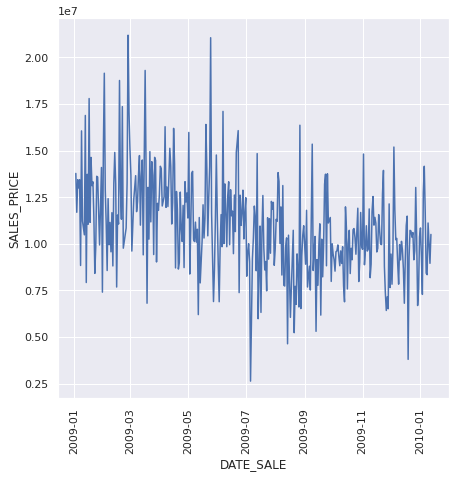

In [ ]:
temp_df = df[["DATE_SALE", "SALES_PRICE"]]
temp_df = temp_df.groupby("DATE_SALE").mean()
# temp_df["MA"] = temp_df["SALES_PRICE"].rolling(10).mean().dropna()['1-7-2009':'1-1-2013']
temp_df_1 = temp_df['01-02-2009':'01-12-2010']
sns.lineplot(y=temp_df_1["SALES_PRICE"], x=temp_df_1.index)
plt.xticks(rotation=90)


(array([734503., 734563., 734624., 734685., 734747., 734808., 734869.]),
 <a list of 7 Text major ticklabel objects>)

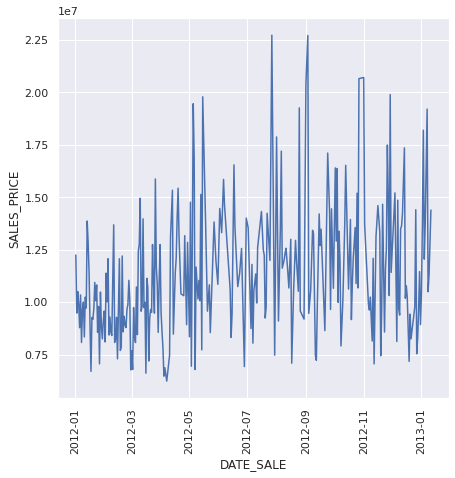

In [ ]:
temp_df_1 = temp_df['01-02-2012':'01-12-2013']
sns.lineplot(y=temp_df_1["SALES_PRICE"], x=temp_df_1.index)
plt.xticks(rotation=90)


    From observing above plots we can add our variable to match the period from 07/2009 to 03/2012


In [ ]:
df["MARKET_CRASH"] = pd.Series(np.zeros(df.shape[0], dtype=np.int8))
mask = (df["DATE_SALE"] >= "01-07-2009") & (df["DATE_SALE"] <= "01-03-2012")
df.loc[mask, "MARKET_CRASH"] = 1
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7103 non-null   object        
 1   INT_SQFT       7103 non-null   int64         
 2   DATE_SALE      7103 non-null   datetime64[ns]
 3   N_BEDROOM      7103 non-null   int32         
 4   N_BATHROOM     7103 non-null   int32         
 5   N_ROOM         7103 non-null   int64         
 6   SALE_COND      7103 non-null   object        
 7   PARK_FACIL     7103 non-null   object        
 8   DATE_BUILD     7103 non-null   datetime64[ns]
 9   BUILDTYPE      7103 non-null   object        
 10  UTILITY_AVAIL  7103 non-null   object        
 11  STREET         7103 non-null   object        
 12  MZZONE         7103 non-null   object        
 13  SALES_PRICE    7103 non-null   int64         
 14  AVG_ROOM_SIZE  7103 non-null   float64       
 15  AGE            7103 n

SALES_PRICE
MARKET_CRASH              
1             1.030968e+07
0             1.155062e+07

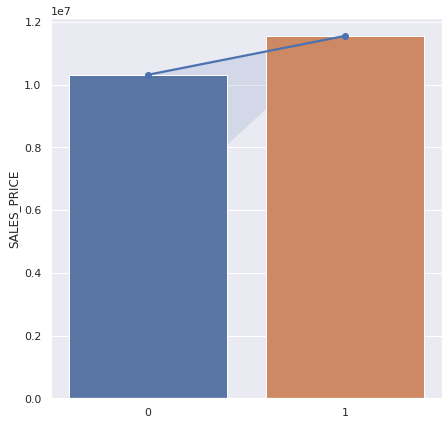

In [ ]:
data = df.groupby("MARKET_CRASH")[
    ["SALES_PRICE"]].mean().sort_values("SALES_PRICE")
x = list(range(data.shape[0]))
sns.barplot(x=x, y="SALES_PRICE", data=data,)
sns.regplot(x=x, y="SALES_PRICE", data=data, scatter_kws={
    "zorder": 10, "alpha": 1}, ci=90)
data


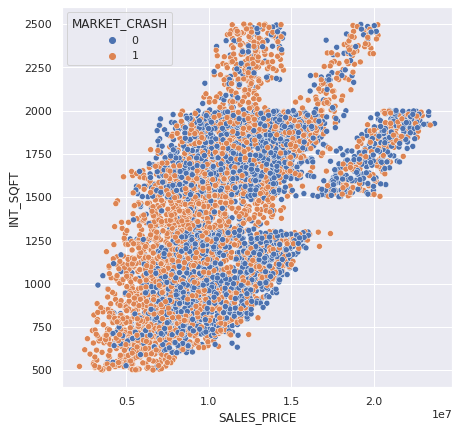

In [ ]:
sns.scatterplot(x="SALES_PRICE", y="INT_SQFT",
                hue="MARKET_CRASH", data=df, )


In [ ]:
to_drop = ["DATE_BUILD", "DATE_SALE"]
df.drop(to_drop, axis=1, inplace=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   object 
 1   INT_SQFT       7103 non-null   int64  
 2   N_BEDROOM      7103 non-null   int32  
 3   N_BATHROOM     7103 non-null   int32  
 4   N_ROOM         7103 non-null   int64  
 5   SALE_COND      7103 non-null   object 
 6   PARK_FACIL     7103 non-null   object 
 7   BUILDTYPE      7103 non-null   object 
 8   UTILITY_AVAIL  7103 non-null   object 
 9   STREET         7103 non-null   object 
 10  MZZONE         7103 non-null   object 
 11  SALES_PRICE    7103 non-null   int64  
 12  AVG_ROOM_SIZE  7103 non-null   float64
 13  AGE            7103 non-null   int64  
 14  MARKET_CRASH   7103 non-null   int8   
dtypes: float64(1), int32(2), int64(4), int8(1), object(7)
memory usage: 728.5+ KB


    We have done our exploratory data analysis and cleaning
    Next we need to create a pipeline to scale, model and predict incoming data


    Split to feature and target


In [ ]:
X, y = df.drop("SALES_PRICE", axis=1), df["SALES_PRICE"]
X.shape


(7103, 14)

    Split to train and test


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape


((4759, 14), (2344, 14))

    Encoding required features


In [ ]:
cnames = df.select_dtypes(include=['object']).columns

label_map = {}
for i, cname in enumerate(cnames):
    data = pd.DataFrame({"SALES_PRICE": y_train, "cname": X_train[cname]}).groupby("cname")\
        .mean().sort_values("SALES_PRICE")
    indices = data.index.to_list()
    label_map[cname] = dict(zip(indices, range(len(indices))))
label_map


{'AREA': {'karapakkam': 0,
  'adyar': 1,
  'chrompet': 2,
  'velachery': 3,
  'kknagar': 4,
  'annanagar': 5,
  'tnagar': 6},
 'SALE_COND': {'partial': 0,
  'family': 1,
  'abnormal': 2,
  'normalsale': 3,
  'adjland': 4},
 'PARK_FACIL': {'no': 0, 'yes': 1},
 'BUILDTYPE': {'house': 0, 'other': 1, 'commercial': 2},
 'UTILITY_AVAIL': {'elo': 0, 'nosewr': 1, 'allpub': 2},
 'STREET': {'noaccess': 0, 'paved': 1, 'gravel': 2},
 'MZZONE': {'a': 0, 'c': 1, 'i': 2, 'rh': 3, 'rl': 4, 'rm': 5}}

    We have noted that BUILDTYPE had an exponential transformation applied to it


In [ ]:
values = list(label_map["BUILDTYPE"].values())
keys = label_map["BUILDTYPE"].keys()

label_map["BUILDTYPE"] = dict(zip(keys, map(transform, values)))


    Label encoding


In [ ]:
X_train.replace(label_map, inplace=True)
X_test.replace(label_map, inplace=True)
X_train.isnull().sum(), X_test.isnull().sum()


(AREA             0
 INT_SQFT         0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 AVG_ROOM_SIZE    0
 AGE              0
 MARKET_CRASH     0
 dtype: int64, AREA             0
 INT_SQFT         0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 AVG_ROOM_SIZE    0
 AGE              0
 MARKET_CRASH     0
 dtype: int64)

    Scaling


In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)


array([[-1.37557642,  0.4895914 ,  0.44691559, ...,  0.72532246,
        -0.58893867,  0.93981955],
       [-0.29496101, -0.52320032, -0.79396614, ...,  0.22046057,
        -0.83225486, -1.06403405],
       [ 1.32596212,  0.78144965, -0.79396614, ...,  1.48261529,
        -1.31888723,  0.93981955],
       ...,
       [-0.29496101, -1.43362384, -0.79396614, ..., -0.19260825,
         1.11427463, -1.06403405],
       [-0.29496101, -1.08513636, -0.79396614, ..., -1.75309045,
         1.03316923, -1.06403405],
       [ 0.78565441,  0.97747386,  1.68779732, ..., -0.10081518,
        -0.26451709,  0.93981955]])

    Clustering AVG_ROOM_SIZE


In [ ]:
cluster_model = KMeans(n_clusters=2)
scaled_df = X_train[["AVG_ROOM_SIZE", "INT_SQFT"]]
cluster_model.fit(scaled_df.to_numpy())
cluster_label = cluster_model.predict(scaled_df.to_numpy())

X_train["AVG_ROOM_SIZE"] = pd.Series(cluster_label, index=X_train.index)

scaled_df = X_test[["AVG_ROOM_SIZE", "INT_SQFT"]]
cluster_label = cluster_model.predict(scaled_df.to_numpy())

X_test["AVG_ROOM_SIZE"] = pd.Series(cluster_label, index=X_test.index)


    Feature Importance


In [ ]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    def sort_key(x): return importances[list(feature_names).index(x)]
    feature_names = sorted(feature_names, key=sort_key, reverse=True)
    importances = sorted(importances, reverse=True)

    sns.set(rc={'figure.figsize': (10, 5)})
    ax = sns.barplot(x=feature_names, y=importances, )
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+0.01
        ax.annotate('{:.1f}%'.format(importances[i]*100), (x, y), ha='center')
    plt.xticks(rotation=90)
    sns.pointplot(x=feature_names, y=np.cumsum(importances), )


    Modeling


In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)


    Evaluation


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.9164399740385974

In [ ]:
coefs = regression_model.coef_
feature_importances_ = abs(coefs)/abs(coefs).sum()

regression_model.feature_importances_ = feature_importances_
dict(zip(regression_model.feature_names_in_, regression_model.feature_importances_))


{'AREA': 0.07295090251242504,
 'INT_SQFT': 0.0002961392342600131,
 'N_BEDROOM': 0.19178432797241138,
 'N_BATHROOM': 0.049257985005589304,
 'N_ROOM': 0.18182818437590162,
 'SALE_COND': 0.01830713454968785,
 'PARK_FACIL': 0.12248522909372422,
 'BUILDTYPE': 0.09607077661287958,
 'UTILITY_AVAIL': 0.009922413768940775,
 'STREET': 0.05862834557134872,
 'MZZONE': 0.06816451582066523,
 'AVG_ROOM_SIZE': 0.09682175107463245,
 'AGE': 5.267004183573842e-06,
 'MARKET_CRASH': 0.03347702740335027}

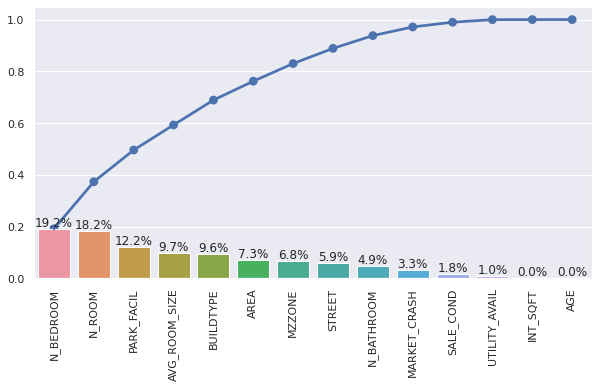

In [ ]:
plot_feature_importance(regression_model)


    Now that our data is ready and our modeling and evaluation are working we can do a n fold cross validation to get the best model


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = [GradientBoostingRegressor, RandomForestRegressor,
          DecisionTreeRegressor, LinearRegression,
          KNeighborsRegressor, SVR]


def model_cv_score(model_class):
    model = model_class()
    return cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)


In [ ]:
scores = []
for model in models:
    print(model)
    score = model_cv_score(model)
    scores.append(score.mean())
scores


<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.linear_model._base.LinearRegression'>
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
<class 'sklearn.svm._classes.SVR'>


[0.9904436427611415,
 0.9873887670323187,
 0.9685048529657246,
 0.9144526177622943,
 0.3407710625349667,
 -0.025135055418376507]

    Select best model


In [ ]:
index = scores.index(max(scores))
models[index]


sklearn.ensemble._gb.GradientBoostingRegressor

    Now that we know that the GradientBoostingRegressor is the best we will use grid search to tune the hyperparameter to get get the best fit


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.1, 0.05, ],
              'n_estimators': [50, 100, 200],
              'max_depth': [4, 6, 8, 10]
              }
model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=model,
                        param_grid=parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
result_df = pd.DataFrame(grid_GBR.cv_results_)
cols = ["param_learning_rate", "param_n_estimators",
        "param_max_depth", "mean_test_score"]
result_df[cols].sort_values("mean_test_score", ascending=False).head()


param_learning_rate param_n_estimators param_max_depth  mean_test_score
2                  0.1                200               4         0.997126
5                  0.1                200               6         0.996691
17                0.05                200               6         0.996113
4                  0.1                100               6         0.995901
14                0.05                200               4         0.994465

    Lets try to improve more by changing our grid from above grid results


In [ ]:
parameters = {'learning_rate': [0.1, 0.2, 0.5],
              'n_estimators': [150, 200, 300],
              'max_depth': [4, 5, 3]
              }
model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=model,
                        param_grid=parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 3],
                         'n_estimators': [150, 200, 300]})

In [ ]:
result_df = pd.DataFrame(grid_GBR.cv_results_)
cols = ["param_learning_rate", "param_n_estimators",
        "param_max_depth", "mean_test_score"]
result_df[cols].sort_values("mean_test_score", ascending=False).head()


param_learning_rate param_n_estimators param_max_depth  mean_test_score
2                  0.1                300               4         0.997683
11                 0.2                300               4         0.997619
5                  0.1                300               5         0.997506
17                 0.2                300               3         0.997492
26                 0.5                300               3         0.997490

    Since we don't see any significant improvement from our previous results we will stick with our previous best params


In [ ]:
model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=4, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


0.9972561444644691

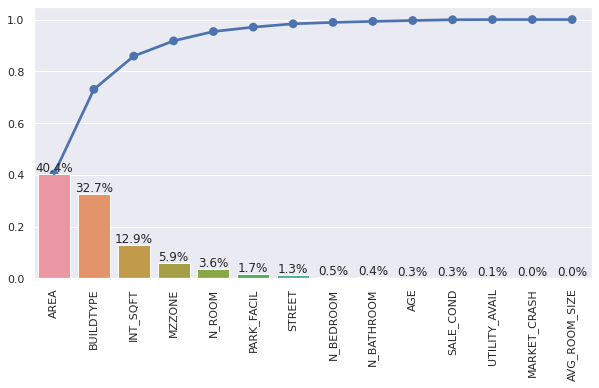

In [ ]:
plot_feature_importance(model)


    Class for predicting range instead of single value


In [ ]:
class GradientBoostingRange():
    def __init__(self, l_quantile=0.1, u_quantile=0.9):
        kv_hp = {"learning_rate": 0.1, "max_depth": 4, "n_estimators": 200}
        self.lower_model = GradientBoostingRegressor(loss="quantile",
                                                     alpha=l_quantile, **kv_hp)
        self.mid_model = GradientBoostingRegressor(**kv_hp)
        self.upper_model = GradientBoostingRegressor(loss="quantile",
                                                     alpha=u_quantile, **kv_hp)

    def fit(self, X_train, y_train):
        self.lower_model.fit(X_train, y_train)
        self.mid_model.fit(X_train, y_train)
        self.upper_model.fit(X_train, y_train)
        models = [self.lower_model, self.mid_model, self.upper_model]
        scores = [r2_score(y_train, model.predict(X_train))for model in models]
        print(scores, "\nModel Ready!")

    def predict(self, X_predict):
        predictions = {}
        predictions['lower'] = self.lower_model.predict(X_predict)
        predictions['mid'] = self.mid_model.predict(X_predict)
        predictions['upper'] = self.upper_model.predict(X_predict)
        return pd.DataFrame(predictions)


In [ ]:
model = GradientBoostingRange()
model.fit(X_train, y_train)


[0.9778735687903686, 0.9985098156772244, 0.9845555589002712] 
Model Ready!


In [ ]:
model.predict(X_test).head()*

lower           mid         upper
0  7.323653e+06  7.655453e+06  8.060617e+06
1  1.108088e+07  1.189304e+07  1.199042e+07
2  1.216095e+07  1.220422e+07  1.270182e+07
3  7.691336e+06  8.108640e+06  8.285681e+06
4  1.372839e+07  1.409082e+07  1.434361e+07